# Practical Session 4: Getting Started with Deep Learning Models in TensorFlow

*This notebook is based on past years' notebooks by Marek Rei and Guy Emerson*

This practical will cover a few different network architectures and we will look at different components that are often used in neural networks in practice. It will also allow you to learn more about [`TensorFlow`](https://www.tensorflow.org), a popular open-source machine learning and deep learning library. I'd also recommend checking the `TensorFlow` documentation to learn more about the rich functionality of this toolkit.


## Learning objectives

In this practical you will learn about:
- The basics of running `TensorFlow` 
- How to implement a feedforward neural network in Python
- How to visualise your network architecture using `TensorBoard` and track changes 
- How to apply deep learning to both classification and regression tasks.

**Additional references**: Aurelien Geron, *Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow*.

Before we start, let's import the usual libraries as we did in previous practicals:

In [1]:
%matplotlib inline 

import numpy as np 
np.random.seed(42)

import matplotlib
from matplotlib import pyplot as plt

Now let's import `TensorFlow` into our notebook. Note: `TensorFlow` v2 was released last year, and it mostly relies on `Keras` interpretative module fit on top of it. As a result, it is much more interpretable and user-friendly than v1, however if you want to better understand the inner workings of `TensorFlow` you are welcome to check the accompanying notebook [`DSPNP_practical4-TFv1.ipynb`](./DSPNP_practical4-TFv1.ipynb): even if you are using `TensorFlow2`, you can still switch to using v1 API, which is available as a submodule. 

In [2]:
import tensorflow as tf
#tf.compat.v1

In [3]:
tf.__version__

'2.3.1'

# Minimal TensorFlow Example

In this example, we create a simple network that takes an input vector, multiplies it by a weight matrix, adds a weight vector, and returns the result.

`tf.Variable` defines model parameters, which can be trained (as we will see shortly). Here, we initialise the matrix variable as a 3x3 matrix, with every entry as 1 (`tf.ones`). Meanwhile, we initialise the 3x1 vector variable with every entry as 0 (`tf.zeros`). `tf.linalg.matvec` multiplies a matrix and a vector.

In [4]:
weight_matrix = tf.Variable(tf.ones(shape=(3,3)))
weight_vector = tf.Variable(tf.zeros(shape=(3,)))

def affine_transformation(input_vector):
    return tf.linalg.matvec(weight_matrix, input_vector) + weight_vector

result = affine_transformation([2.,3.,7.])
print(result)

tf.Tensor([12. 12. 12.], shape=(3,), dtype=float32)


The following [reset function](https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session) is often useful. It is necessary to reset the `TensorFlow` network from time to time: as we have many different small networks in one notebook and we don't want them interfering with each other, as a pre-emptive measure we will occasionally reset the computation graph. 

In [5]:
tf.keras.backend.clear_session()

# Training the Parameters

This example shows how to optimise the parameters in your model.

We first define a network that takes an input vector, multiplies it with a matrix (as defined above), and sums the elements of the resulting vector (using `tf.math.reduce_sum`). We then define a loss function as the square error. Given a specific input and output, we can calculate the loss of applying the network to the input.

Next, we define an optimiser – here, we are using *stochastic gradient descent* (*SGD*) with the learning rate $0.001$. We then use this optimiser to train this network for $10$ epochs, over this single training point. This optimises the output towards the target value $20$. Printing out the results, we can see that the output gradually moves towards the target.

In [6]:
tf.keras.backend.clear_session()

weight_matrix = tf.Variable(tf.ones(shape=(3,3)))
weight_vector = tf.Variable(tf.zeros(shape=(3,)))

def network(input_vector):
    return tf.math.reduce_sum(affine_transformation(input_vector))

def loss_fn(predicted, gold):
    return tf.square(predicted - gold)

input = [2.,3.,7.]
gold_output = 20

def loss():
    return loss_fn(network(input), gold_output)

opt = tf.keras.optimizers.SGD(learning_rate=1e-3)

for epoch in range(35):
    opt.minimize(loss, var_list=[weight_matrix, weight_vector])
    print(network(input))

tf.Tensor(29.952, shape=(), dtype=float32)
tf.Tensor(26.190144, shape=(), dtype=float32)
tf.Tensor(23.850271, shape=(), dtype=float32)
tf.Tensor(22.39487, shape=(), dtype=float32)
tf.Tensor(21.489607, shape=(), dtype=float32)
tf.Tensor(20.926535, shape=(), dtype=float32)
tf.Tensor(20.576305, shape=(), dtype=float32)
tf.Tensor(20.358461, shape=(), dtype=float32)
tf.Tensor(20.222961, shape=(), dtype=float32)
tf.Tensor(20.138683, shape=(), dtype=float32)
tf.Tensor(20.086262, shape=(), dtype=float32)
tf.Tensor(20.053656, shape=(), dtype=float32)
tf.Tensor(20.033375, shape=(), dtype=float32)
tf.Tensor(20.020758, shape=(), dtype=float32)
tf.Tensor(20.01291, shape=(), dtype=float32)
tf.Tensor(20.00803, shape=(), dtype=float32)
tf.Tensor(20.004995, shape=(), dtype=float32)
tf.Tensor(20.003109, shape=(), dtype=float32)
tf.Tensor(20.001932, shape=(), dtype=float32)
tf.Tensor(20.001202, shape=(), dtype=float32)
tf.Tensor(20.000748, shape=(), dtype=float32)
tf.Tensor(20.000465, shape=(), dtype=flo

**Optional**: Try changing the learning rate and the number of epochs. What results are you getting?

- Initial result with lr = 1e-3 and #epoch = 10

tf.Tensor(29.952, shape=(), dtype=float32)
tf.Tensor(26.190144, shape=(), dtype=float32)
tf.Tensor(23.850271, shape=(), dtype=float32)
tf.Tensor(22.39487, shape=(), dtype=float32)
tf.Tensor(21.489607, shape=(), dtype=float32)
tf.Tensor(20.926535, shape=(), dtype=float32)
tf.Tensor(20.576305, shape=(), dtype=float32)
tf.Tensor(20.358461, shape=(), dtype=float32)
tf.Tensor(20.222961, shape=(), dtype=float32)
tf.Tensor(20.138683, shape=(), dtype=float32)

- With lr = 1e-2 and 10 epoch
tf.Tensor(-24.48, shape=(), dtype=float32)
tf.Tensor(143.6544, shape=(), dtype=float32)
tf.Tensor(-323.75922, shape=(), dtype=float32)
tf.Tensor(975.6506, shape=(), dtype=float32)
tf.Tensor(-2636.7085, shape=(), dtype=float32)
tf.Tensor(7405.6504, shape=(), dtype=float32)
tf.Tensor(-20512.11, shape=(), dtype=float32)
tf.Tensor(57099.266, shape=(), dtype=float32)
tf.Tensor(-158660.36, shape=(), dtype=float32)
tf.Tensor(441151.38, shape=(), dtype=float32)

-- Overshooting big time

- Back to lr = 1e-3. Try 20 epochs

 last = tf.Tensor(20.001202, shape=(), dtype=float32) =  improvement

-- 100 epochs = converting to 20 pretty early on 

-- 40 epoch = more than enough for converting

-- 35 enough




# Network Layers

For most cases, we don't actually need to create the trainable variables manually. Instead, the feedfoward layer is available as a pre-defined module.

We can define a network as a sequence of operations, using [`tf.keras.Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential). The first operation here is a dense feedforward layer (`tf.keras.layers.Dense`), which acts like the `affine_transfomation` function we defined earlier. The second operation sums the elements of the vector – this isn't a standard operation, so we use `tf.keras.layers.Lambda` to allow a user-defined function.

By default, the parameters in a layer (like [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) are initialised randomly.

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=(3,)),
    tf.keras.layers.Lambda(lambda x: tf.math.reduce_sum(x, axis=1))
])

Note that such a model expects the input data to be given as a *minibatch* – this means that the input tensor should have an extra index, which ranges over datapoints. In our case, instead of passing a 3-dimensional input vector, we have to pass an Nx3 matrix, where N is the number of datapoints. Here, we can apply the model to a single datapoint (a 1x3 matrix):

In [8]:
model.predict(tf.constant([[2.,3.,7.]]))

array([-3.755041], dtype=float32)

Now that we have a model defined in terms of layers, let's replace the manually created variables of the previous section.

In [9]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=(3,)),
    tf.keras.layers.Lambda(lambda x: tf.math.reduce_sum(x, axis=1))
])

def loss_fn(predicted, gold):
    return tf.square(predicted - gold)

input = tf.constant([[2.,3.,7.]])
gold_output = 20

def loss():
    return loss_fn(model(input), gold_output)

opt = tf.keras.optimizers.SGD(learning_rate=1e-3)

for epoch in range(10):
    opt.minimize(loss, var_list=model.trainable_variables)
    print(model(input))

tf.Tensor([3.3954916], shape=(1,), dtype=float32)
tf.Tensor([9.671996], shape=(1,), dtype=float32)
tf.Tensor([13.575982], shape=(1,), dtype=float32)
tf.Tensor([16.00426], shape=(1,), dtype=float32)
tf.Tensor([17.51465], shape=(1,), dtype=float32)
tf.Tensor([18.454113], shape=(1,), dtype=float32)
tf.Tensor([19.03846], shape=(1,), dtype=float32)
tf.Tensor([19.40192], shape=(1,), dtype=float32)
tf.Tensor([19.627996], shape=(1,), dtype=float32)
tf.Tensor([19.768614], shape=(1,), dtype=float32)


In fact, for standard optimizers and loss functions, the `TensorFlow` API makes it even easier for us:

In [10]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=(3,)),
    tf.keras.layers.Lambda(lambda x: tf.math.reduce_sum(x))
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), # alternatively, optimizer=`sgd`
              loss='mean_squared_error')

input = tf.constant([[2.,3.,7.]])
gold_output = tf.constant([[20.]])

for epoch in range(10):
    model.train_on_batch(input, gold_output)
    print(model(input))

tf.Tensor(18.102009, shape=(), dtype=float32)
tf.Tensor(18.819447, shape=(), dtype=float32)
tf.Tensor(19.265697, shape=(), dtype=float32)
tf.Tensor(19.543262, shape=(), dtype=float32)
tf.Tensor(19.715912, shape=(), dtype=float32)
tf.Tensor(19.823296, shape=(), dtype=float32)
tf.Tensor(19.89009, shape=(), dtype=float32)
tf.Tensor(19.931637, shape=(), dtype=float32)
tf.Tensor(19.957478, shape=(), dtype=float32)
tf.Tensor(19.973553, shape=(), dtype=float32)


# Activation Functions

As you saw in the previous lectures, activation functions are what gives neural networks their power to model non-linear patterns in the data. After applying an affine transformation, we then apply a non-linear activation function to each element. There are a number of different activation functions to choose from.

The [sigmoid function](https://en.wikipedia.org/wiki/Logistic_function), also known as the logistic function, is the most classic non-linear activation. It transforms the value to a range between 0 and 1.

In [11]:
hidden = tf.keras.layers.Dense(100, activation='sigmoid')

In modern networks, the [tanh function](https://en.wikipedia.org/wiki/Hyperbolic_function) is used more often. It has more flexibility, as it transforms the input value to a range between -1 and 1, and can therefore output negative values as well.

In [12]:
hidden = tf.keras.layers.Dense(100, activation='tanh')

Another popular one is the [Rectified Linear Unit](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) function, or the ReLU. This function acts as a linear function above zero, but restricts everything below zero to 0. By doing this it also introduces non-linearity.

In [13]:
hidden = tf.keras.layers.Dense(100, activation='relu')

The partial linear property of the ReLU can help it converge faster on some tasks, although in practice tanh may be a more robust option.

Finally, for classification tasks [softmax](https://en.wikipedia.org/wiki/Softmax_function) is an important activation function. Unlike the activation functions mentioned above, it isn't applied to each element separately. It converts a vector of scores into a probability distribution: after applying the softmax, all values are between 0 and 1, and together they sum to 1. Higher scores are assigned to higher probabilities, via the formula:


$P(i) \propto \exp(x_i)$


Or, more explicitly:

$P(i) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$

Notice how the value of the denominator depends on all other values.

The softmax is often used in the output layer of a network performing classification, in order to predict a probability distribution over all the possible classes. For example, the following model takes a 20-dimensional input, maps it to a 50-dimensional hidden layer, then maps it to a distribution over 10 output classes.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(20,), activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Operations and Useful Functions

`TensorFlow` has corresponding versions of all the main operations you might want to use. This means you can add them into your computation graph and into your neural network. The most common operations are available in `tf`, and further operations are available in `tf.math`.


In [15]:
tf.abs # absolute value
tf.negative # computes the negative value
tf.sign # returns 1, 0 or -1 depending on the sign of the input
tf.math.reciprocal # reciprocal 1/x
tf.square # return input squared
tf.round # return rounded value
tf.sqrt # square root
tf.math.rsqrt # reciprocal of square root
tf.pow # power
tf.exp # exponential

<function tensorflow.python.ops.math_ops.exp(x, name=None)>

These operations can be applied to scalar values, but also to vectors, matrices and higher-order tensors. In the latter case, they will be applied element-wise. For example:

In [16]:
print(tf.negative([3.2,-2.7]))
print(tf.square([1.5,-2.1]))

tf.Tensor([-3.2  2.7], shape=(2,), dtype=float32)
tf.Tensor([2.25      4.4099994], shape=(2,), dtype=float32)


Some useful operations are performed over a whole vector/matrix tensor and return a single value (e.g., you saw `tf.reduce_sum` earlier):

In [17]:
tf.reduce_sum # Add elements together
tf.reduce_mean # Average over elements
tf.reduce_min # Minimum value
tf.reduce_max # Maximum value
tf.argmax # Index of the largest value
tf.argmin # Index of the smallest value

<function tensorflow.python.ops.math_ops.argmin_v2(input, axis=None, output_type=tf.int64, name=None)>

# Adaptive Learning Rates

Above, we used stochastic gradient descent (SGD) to train our model. This uses a fixed learning rate to update the parameters. Several optimisation algorithms are based on SGD, but adaptively adjust the learning rate (usually for each parameter separately).

Different adaptive learning rate strategies are also implemented in `TensorFlow` as functions. For example:

In [18]:
tf.keras.optimizers.SGD
tf.keras.optimizers.Adadelta
tf.keras.optimizers.Adam
tf.keras.optimizers.RMSprop

tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop

If you are interested in the differences between these strategies, [this blog post](http://ruder.io/optimizing-gradient-descent/) provides more details.

# Training an XOR Function

[XOR](https://en.wikipedia.org/wiki/XOR_gate) is the function that takes two binary values and returns 1 only if one of them is 1 and the other 0, while returning 0 if both of them have the same value. It can be a difficult function to learn and cannot be modelled with a linear model. But let's try anyway.

Our dataset consists of all the possible different states that XOR can take:

In [19]:
xor_input = tf.constant([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
xor_output = tf.constant([0.0, 1.0, 1.0, 0.0])

Now we construct a linear network and optimize it on this dataset, printing out the predictions at each epoch:

In [20]:
tf.keras.backend.clear_session()

linear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,))
])

linear_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                     loss='mean_squared_error')

for epoch in range(100):
    linear_model.train_on_batch(xor_input, xor_output)
    if (epoch + 1) % 10 == 0:
        print('after {} epochs:'.format(epoch+1), linear_model(xor_input).numpy().reshape((4,)))

after 10 epochs: [0.4314911  0.21679646 0.7357888  0.5210942 ]
after 20 epochs: [0.45656076 0.33753362 0.6482736  0.52924645]
after 30 epochs: [0.4685589  0.4020342  0.58808565 0.52156097]
after 40 epochs: [0.47714671 0.44071558 0.5521115  0.5156803 ]
after 50 epochs: [0.48338673 0.46404445 0.5307413  0.51139903]
after 60 epochs: [0.48792288 0.4781378  0.51807165 0.5082866 ]
after 70 epochs: [0.49122047 0.4866673  0.51057714 0.506024  ]
after 80 epochs: [0.49361765 0.49184054 0.50615627 0.50437915]
after 90 epochs: [0.49536034 0.49498624 0.50355756 0.5031835 ]
after 100 epochs: [0.49662715 0.4969047  0.5020367  0.5023142 ]


As you can see, it's not doing very well. Ideally, the predictions should be [0, 1, 1, 0], but in this case they are hovering around 0.5 for every input case.

In order to improve this architecture, let's add some non-linear layers into our model:

In [21]:
tf.keras.backend.clear_session()

nonlinear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape=(2,), activation='tanh'), # note that these settings can be changed
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nonlinear_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
                        loss='mean_squared_error')

for epoch in range(100):
    nonlinear_model.train_on_batch(xor_input, xor_output)
    if (epoch + 1) % 10 == 0:
        print('after {} epochs:'.format(epoch+1), nonlinear_model(xor_input).numpy().reshape((4,)))

after 10 epochs: [0.45989323 0.43093646 0.5608539  0.4981238 ]
after 20 epochs: [0.44220766 0.4436216  0.5664791  0.4958412 ]
after 30 epochs: [0.42046416 0.4651907  0.5780684  0.4755422 ]
after 40 epochs: [0.3811382  0.5118334  0.60057974 0.44931892]
after 50 epochs: [0.3169607  0.57953346 0.6369069  0.4177347 ]
after 60 epochs: [0.24966076 0.65029657 0.683118   0.36941773]
after 70 epochs: [0.1966033  0.7101349  0.7308061  0.31433743]
after 80 epochs: [0.158757   0.75610703 0.77194    0.26597506]
after 90 epochs: [0.13208759 0.79046917 0.80423    0.22808403]
after 100 epochs: [0.11291733 0.8162875  0.8289151  0.19923615]


This is much better. The values are much closer to [0, 1, 1, 0] than before, and they will continue improving if we train for longer. (Remember that the model is initialised randomly – if you run it a few times, you will see that the results vary with each run. Check the [documentation](https://www.tensorflow.org/tutorials/keras/save_and_load) on how you can save and restore a particular model).

We also had to increase the learning rate for this network. It would still be learning with a smaller learning rate, but it would be converging very slowly. As we discussed in the lectures, learning rate is a hyperparameter that can vary quite a bit depending on the network architecture and dataset.

**Optional**: Try changing various settings in the current network, e.g. *width* (number of neurons per layer), *depth* (number of layers), *activation functions* applied to each layer, and number of *epochs*. What changes do you observe?

In [22]:
# Mine

tf.keras.backend.clear_session()

nonlinear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(32, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(16, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(8, input_shape=(2,), activation='tanh'), # note that these settings can be changed
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nonlinear_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
                        loss='mean_squared_error')

for epoch in range(1000):
    nonlinear_model.train_on_batch(xor_input, xor_output)
    if (epoch + 1) % 100 == 0:
        print('after {} epochs:'.format(epoch+1), nonlinear_model(xor_input).numpy().reshape((4,)))

after 100 epochs: [0.03405055 0.9807839  0.97118914 0.02849326]
after 200 epochs: [0.0208869  0.9877085  0.98192626 0.01688921]
after 300 epochs: [0.01615027 0.99028826 0.9858793  0.01283455]
after 400 epochs: [0.01357406 0.99171394 0.98808396 0.01066193]
after 500 epochs: [0.01190048 0.99266267 0.9895389  0.00927323]
after 600 epochs: [0.01070145 0.99334526 0.9905808  0.0082871 ]
after 700 epochs: [0.00979254 0.9938662  0.99137616 0.00754517]
after 800 epochs: [0.00907442 0.9942793  0.99200195 0.00696218]
after 900 epochs: [0.00848827 0.9946203  0.9925239  0.00649017]
after 1000 epochs: [0.00799954 0.99490553 0.9929513  0.00609764]


- tf.keras.layers.Dense(100, input_shape=(2,), activation='relu') - got after 100 epochs: [0.15288806 0.91357195 0.910642   0.06977707]

- tf.keras.layers.Dense(100, input_shape=(2,), activation='sigmoid') got after 100 epochs: [0.7675986  0.7659911  0.74394864 0.74212164] or after 100 epochs: [0.2369608  0.24330732 0.2336308  0.2398197 ] = weird

- with more layers 

nonlinear_model = tf.keras.Sequential([
   
    tf.keras.layers.Dense(16, input_shape=(2,), activation='tanh'),
   
    tf.keras.layers.Dense(8, input_shape=(2,), activation='tanh'), # note that these settings can be changed
   
    tf.keras.layers.Dense(1, activation='sigmoid')
])
 

 after 100 epochs: [0.07005394 0.90713346 0.90309864 0.0912008 ]



nonlinear_model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(16, input_shape=(2,), activation='tanh'),
    
    tf.keras.layers.Dense(8, input_shape=(2,), activation='relu'), # note that these settings can be changed
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])


after 100 epochs: [0.0411101  0.9592626  0.96524894 0.04195771]


- best I got with 1000 epoch
nonlinear_model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(16, input_shape=(2,), activation='relu'),
    
    tf.keras.layers.Dense(8, input_shape=(2,), activation='tanh'), # note that these settings can be changed
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

after 1000 epochs: [0.01317123 0.99075276 0.991938   0.0065771 ]



# XOR Classification

We can also do classification with `TensorFlow`. For this, we often use the softmax activation function described above, which predicts the probability for each of the possible classes.

We also have to change the loss function, as squared error is not suitable for classification. A suitable loss function is [cross entropy](https://en.wikipedia.org/wiki/Cross_entropy). Since the correct output has probability 1 for the correct class, and probability 0 for the rest, minimising cross entropy is the same as minimising the negative log probability of the correct class for each datapoint. In other words, by minimising cross entropy, we are trying to find the maximum likelihood model, which assigns high values for the correct label.

We can change the XOR example above to perform classification instead. In this case, we are constructing a binary classifier – choosing between the classes of 0 and 1. The output here prints the predicted probabilities of the two classes.

In [23]:
tf.keras.backend.clear_session()

nonlinear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

nonlinear_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
                        loss='sparse_categorical_crossentropy')

for epoch in range(50):
    nonlinear_model.train_on_batch(xor_input, xor_output)
    if (epoch + 1) % 10 == 0:
        print('after {} epochs:'.format(epoch+1), nonlinear_model(xor_input).numpy(), sep='\n')

after 10 epochs:
[[0.5755808  0.42441922]
 [0.51878613 0.4812138 ]
 [0.22188988 0.7781101 ]
 [0.5690694  0.4309306 ]]
after 20 epochs:
[[0.6481799  0.35182008]
 [0.3930721  0.60692793]
 [0.07570078 0.92429924]
 [0.5817306  0.41826934]]
after 30 epochs:
[[0.76032287 0.23967713]
 [0.27142018 0.7285798 ]
 [0.03043336 0.96956664]
 [0.8030073  0.19699265]]
after 40 epochs:
[[0.91551244 0.08448751]
 [0.09463698 0.90536296]
 [0.0310323  0.9689677 ]
 [0.93439513 0.0656049 ]]
after 50 epochs:
[[0.9531057  0.04689433]
 [0.04946918 0.9505309 ]
 [0.02252371 0.9774763 ]
 [0.96838623 0.03161371]]


Let's convert these probabilities into class predictions and also report some of the more familiar [evaluation metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics), e.g. *accuracy*:

In [24]:
tf.keras.backend.clear_session()

nonlinear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

nonlinear_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])  

for epoch in range(50):
    nonlinear_model.train_on_batch(xor_input, xor_output)
    predictions = nonlinear_model.predict(xor_input)
    result = tf.argmax(predictions, axis=1)
    
    if (epoch + 1) % 10 == 0:
        print('\nAfter {} epochs:'.format(epoch+1), " ".join([str(x) for x in result.numpy()]))
        test_loss, test_acc = nonlinear_model.evaluate(xor_input, xor_output, verbose=2)
        print('\nAccuracy:', test_acc)



After 10 epochs: 0 1 0 0
1/1 - 0s - loss: 0.5911 - accuracy: 0.7500

Accuracy: 0.75

After 20 epochs: 0 1 1 0
1/1 - 0s - loss: 0.5160 - accuracy: 1.0000

Accuracy: 1.0

After 30 epochs: 0 1 1 0
1/1 - 0s - loss: 0.4340 - accuracy: 1.0000

Accuracy: 1.0

After 40 epochs: 0 1 1 0
1/1 - 0s - loss: 0.3807 - accuracy: 1.0000

Accuracy: 1.0

After 50 epochs: 0 1 1 0
1/1 - 0s - loss: 0.3614 - accuracy: 1.0000

Accuracy: 1.0


You should be able to see in this printout that the model starts off with incorrect predictions, but fairly soon learns to return the correct sequence of [0, 1, 1, 0].

Finally, here is how you can print out the confusion matrix. Since we are looking into a simple case here and the predictions from above are quite accurate, there is not much to be learned from the confusion matrix at this point (but note that this functionality may come in handy later in your practical):

In [25]:
conf_mx = tf.math.confusion_matrix(xor_output, result.numpy()).numpy()
print(conf_mx)

[[2 0]
 [0 2]]


# Minibatching

For the XOR data, there are only 4 datapoints. However, with realistic datasets, it is inefficient to train on the whole dataset at once, because this will require a lot of computation in order to make a single update step. 

Instead, we can train on a batch of data at a time. For example, here is how you can take batches of 2 datapoints for the XOR data:

In [26]:
tf.keras.backend.clear_session()

nonlinear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

nonlinear_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
                        loss='sparse_categorical_crossentropy')

BATCH_SIZE = 2

for epoch in range(50):
    for i in range(0,len(xor_input),BATCH_SIZE):
        input_batch = xor_input[i:i+BATCH_SIZE]
        output_batch = xor_output[i:i+BATCH_SIZE]
        nonlinear_model.train_on_batch(input_batch, output_batch)
    if (epoch + 1) % 10 == 0:
        print('after {} epochs:'.format(epoch+1), nonlinear_model(xor_input).numpy(), sep='\n')

after 10 epochs:
[[0.6146366  0.38536337]
 [0.32704777 0.67295223]
 [0.14118719 0.8588128 ]
 [0.8864163  0.1135837 ]]
after 20 epochs:
[[0.85141915 0.14858085]
 [0.03759621 0.96240383]
 [0.02701439 0.9729856 ]
 [0.98371613 0.01628381]]
after 30 epochs:
[[0.92407423 0.0759258 ]
 [0.0157696  0.98423034]
 [0.01245207 0.9875479 ]
 [0.9922225  0.00777754]]
after 40 epochs:
[[0.9498043  0.05019573]
 [0.00977722 0.9902228 ]
 [0.0082536  0.9917464 ]
 [0.99536395 0.00463601]]
after 50 epochs:
[[0.96288854 0.03711141]
 [0.00697349 0.9930265 ]
 [0.00622556 0.9937744 ]
 [0.99687386 0.00312617]]


Again, this kind of functionality is built into `TensorFlow`. The following code trains the model with the given batch size and number of epochs:

In [27]:
tf.keras.backend.clear_session()

nonlinear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

nonlinear_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
                        loss='sparse_categorical_crossentropy')

nonlinear_model.fit(xor_input, xor_output, batch_size=2, epochs=50)

print('final loss:', nonlinear_model.evaluate(xor_input, xor_output))
print('final predictions:', nonlinear_model.predict(xor_input), sep='\n')

Epoch 1/50
2/2 [==============================] - 0s 998us/step - loss: 1.6983
Epoch 2/50
2/2 [==============================] - 0s 496us/step - loss: 0.7185
Epoch 3/50
2/2 [==============================] - 0s 499us/step - loss: 0.9771
Epoch 4/50
2/2 [==============================] - 0s 999us/step - loss: 0.6602
Epoch 5/50
2/2 [==============================] - 0s 512us/step - loss: 0.9783
Epoch 6/50
2/2 [==============================] - 0s 997us/step - loss: 0.7468
Epoch 7/50
2/2 [==============================] - 0s 997us/step - loss: 0.6661
Epoch 8/50
2/2 [==============================] - 0s 996us/step - loss: 0.6424
Epoch 9/50
2/2 [==============================] - 0s 998us/step - loss: 0.9845
Epoch 10/50
2/2 [==============================] - 0s 499us/step - loss: 1.0566
Epoch 11/50
2/2 [==============================] - 0s 998us/step - loss: 0.7347
Epoch 12/50
2/2 [==============================] - 0s 996us/step - loss: 0.6960
Epoch 13/50
2/2 [==============================] 

# TensorBoard

So far, you have been exploring the results using simple print out messages. However, neural networks can grow very large and complicated, and you may wish to visualise and explore various components along the way. Visualisation in this case is not only a useful method for reporting and sharing your results, but also a good way to inspect your network and debug it. 

[`TensorBoard`](https://www.tensorflow.org/tensorboard) provides you with all the needed visualisation functionality and allows you to:

- track and visualise metrics such as loss and accuracy;
- visualise the model graph (ops and layers);
- view histograms of weights, biases, or other tensors as they change over time;
- project embeddings to a lower dimensional space;
- display images, text, and audio data;
- profile TensorFlow programs;

among other things. Moreover, you can run it in your browser or embed it directly into your notebook as the code below shows:

In [28]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [29]:
%reload_ext tensorboard

Since you will likely be introducing changes into your network and rerunning your code, it's important to be able to distinguish between these different runs to track the changes. Every time you run a new model, it will be stored in log files and added to your `TensorBoard`, so a good way to distinguish between various models is to add a time stamp to each of them. Let's add this functionality:

In [30]:
import datetime

Now, make sure you clean all the previous logs (e.g., if you've run this notebook before). You can clear any logs from previous runs by running `rm -rf ./logs/` from within your notebook folder in your terminal.

Once this is done, let's train a network and store its details in the log files.

In [31]:
tf.keras.backend.clear_session()

nonlinear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(2,), activation='tanh'),
    tf.keras.layers.Dense(2, activation='softmax')
])

nonlinear_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
                        loss='sparse_categorical_crossentropy')

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

nonlinear_model.fit(xor_input, xor_output, 
                    batch_size=2, epochs=50, 
                    validation_data=(xor_input, xor_output),
                    callbacks=[tensorboard_callback])

print('final loss:', nonlinear_model.evaluate(xor_input, xor_output))
print('final predictions:', nonlinear_model.predict(xor_input), sep='\n')

Epoch 1/50
1/2 [==============>...............] - ETA: 0s - loss: 0.6669WARNING:tensorflow:From C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
2/2 [==============================] - 1s 506ms/step - loss: 0.7930 - val_loss: 0.7293
Epoch 2/50
2/2 [==============================] - 0s 33ms/step - loss: 2.1100 - val_loss: 0.8371
Epoch 3/50
2/2 [==============================] - 0s 24ms/step - loss: 0.8793 - val_loss: 0.7183
Epoch 4/50
2/2 [==============================] - 0s 25ms/step - loss: 0.7631 - val_loss: 0.7015
Epoch 5/50
2/2 [==============================] - 0s 90ms/step - loss: 0.7424 - val_loss: 0.6861
Epoch 6/50
2/2 [==============================] - 0s 32ms/step - loss: 1.4614 - val_loss: 0.7392
Epoch 7/50
2/2 [==============================

And now you can explore your model in `TensorBoard`:

In [32]:
%tensorboard --logdir logs/fit --host localhost

Reusing TensorBoard on port 6006 (pid 3400), started 1:58:19 ago. (Use '!kill 3400' to kill it.)

You can explore both the results (e.g., learning curves) under the `Scalars` tab and the network architecture itself under the `Graphs` tab. All visualisations are interactive – note that you can scroll in on the network components in the `Graph` visualisation and double-click on the "+" sign in the upper right corner of any component to track operations, weights, etc.

A brief overview of the dashboards from [`TensorBoard` documentation](https://www.tensorflow.org/tensorboard/get_started):

- The `Scalars` dashboard shows how the loss and metrics change with every epoch. You can use it to also track training speed, learning rate, and other scalar values.
- The `Graphs` dashboard helps you visualise your model. In this case, the Keras graph of layers is shown which can help you ensure it is built correctly.
- The `Distributions` and `Histograms` dashboards show the distribution of a Tensor over time. This can be useful to visualize weights and biases and verify that they are changing in an expected way.

There are additional `TensorBoard` plugins, which are automatically enabled when you log other types of data (note, it is not applicable to this notebook, as you are not working with any other types of data here). For example, the Keras `TensorBoard` callback lets you log images and embeddings as well. You can see what other plugins are available in `TensorBoard` by clicking on the "inactive" dropdown towards the top right.


# Keeping track of the history

There are other ways to get more information and description of your model, which are useful when you introduce more complexity to the model and would like to keep track of the changes. We'll summarise them in this section.

In [33]:
tf.keras.backend.clear_session()
nonlinear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

For instance, here is how you can return the information on the networks' layers and their types:

In [34]:
nonlinear_model.layers

And here is how you can get a concise summary of the network layers (note that the first dimension in the output shape column is specified as `None` – this is to denote that this dimension is variable as it depends on the batch size):

In [35]:
nonlinear_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


Finally, you can also plot tje model summary like so:

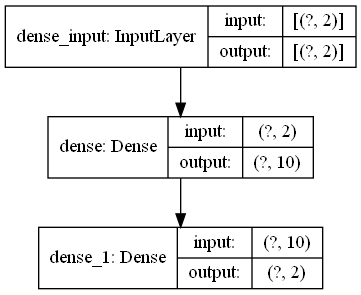

In [36]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz 2.44.1/bin/'
tf.keras.utils.plot_model(nonlinear_model, show_shapes=True)

Below are a number of ways to extract (and store) the information on individual layers, as well as on weights and biases in the network:

In [37]:
hidden1 = nonlinear_model.layers[1]
hidden1.name

'dense_1'

In [38]:
nonlinear_model.get_layer(hidden1.name) is hidden1

True

In [39]:
weights, biases = hidden1.get_weights()

In [40]:
weights

array([[-0.64844376, -0.5216976 ],
       [-0.33111575, -0.6379927 ],
       [ 0.23762882, -0.6461444 ],
       [-0.7063906 , -0.29117098],
       [-0.69072443, -0.16513067],
       [ 0.27732825, -0.36772484],
       [ 0.482199  , -0.69763535],
       [ 0.5370552 , -0.19780695],
       [-0.4398944 , -0.6286145 ],
       [ 0.0842163 ,  0.3300665 ]], dtype=float32)

In [41]:
weights.shape

(10, 2)

In [42]:
biases

array([0., 0.], dtype=float32)

In [43]:
biases.shape

(2,)

Now let's train the model and track the changes in the loss and accuracy on the training and validation data:

In [44]:
nonlinear_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
                        loss='sparse_categorical_crossentropy',
                       metrics = ['accuracy'])

In [45]:
history = nonlinear_model.fit(xor_input, xor_output, batch_size=2, epochs=50,
                    validation_data=(xor_input, xor_output))


Epoch 1/50
2/2 [==============================] - 0s 62ms/step - loss: 0.7609 - accuracy: 0.2500 - val_loss: 0.7885 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 1.4270 - accuracy: 0.5000 - val_loss: 1.2168 - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 0s 6ms/step - loss: 1.6811 - accuracy: 0.0000e+00 - val_loss: 0.7909 - val_accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 0s 7ms/step - loss: 1.2337 - accuracy: 0.0000e+00 - val_loss: 0.7302 - val_accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 0s 7ms/step - loss: 0.7164 - accuracy: 0.5000 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 0s 9ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 0s 7ms/step - loss: 0.6901 - accuracy: 0.7500 - val_loss: 0.6870 - val_accuracy: 0.7500
Epoch 8/50
2/2 [=========

In [46]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 2}

In [47]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [48]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Finally, let's plot the changes across all epochs:

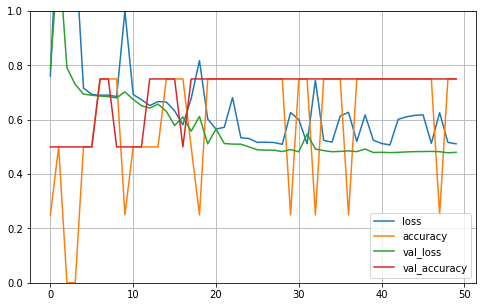

In [49]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Case of regression

Finally, you can address not only classification but also regression tasks with `TensorFlow`. Let's look at a short example here.

In Practical 1 you have been using a custom version of the California housing dataset (refer to the Practical 1 to see what differences were introduced in the original data). The original version is [accessible via `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html), and the code below shows how to access a dataset from `sklearn` (in fact, `sklearn` provides access to a number of useful ML datasets, so take a look at the [documentation](https://scikit-learn.org/stable/datasets/index.html)):

In [50]:
np.random.seed(42)
tf.random.set_seed(42)
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

Now let't split the dataset into training, validation, and test sets. Note that you can access the data from the dataset with `housing.data`, and the labels with `housing.target`:

In [51]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

And scale the data using standardisation:

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

The code below shows to you how to implement a regression model using `TensorFlow`. It is quite similar to the code for classification with minor difference: the loss function that you use here is mean squared error, and the output is a single predicted value thus the dimensionality of the output layer.

In [53]:
reg_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1)
])

reg_model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(lr=1e-3))
history = reg_model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = reg_model.evaluate(X_test, y_test)

Epoch 1/20
363/363 [==============================] - 0s 949us/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 711us/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 688us/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 736us/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 722us/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 730us/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 736us/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 727us/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 731us/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 678us/step - loss: 0.487

Now let's plot the results:

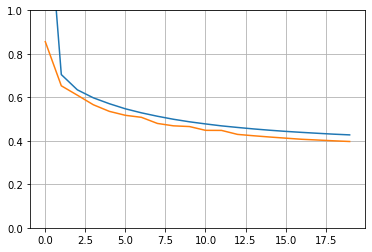

In [54]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Finally, you can also explore model's predictions on some selected datapoints and compare them to the true values for these datapoints:

In [55]:
X_new = X_test[:3]
y_pred = reg_model.predict(X_new)

y_pred

array([[0.3885664],
       [1.6792021],
       [3.1022797]], dtype=float32)

In [56]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

# Assignment: Classification of House Locations

In the first practical, you used the California House Prices Dataset in order to predict the prices of the houses based on various properties about the houses. In this assignment, we will experiment with `TensorFlow` and train a model to predict the "ocean proximity" of a house.

First, let's read in the dataset:

In [57]:
import pandas as pd
data = pd.read_csv('housing/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Next, we split the ocean proximity column from the other features and convert the values to numerical IDs. Remember, the `ocean_proximity` column already contains discrete classes, so it is well-suited for the classification task. However, these are strings and in order to optimise the softmax function in `TensorFlow`, we need numerical IDs instead of strings. We can use the `pandas` map function to do the conversion:

In [58]:
X = data.copy().drop(["ocean_proximity"], axis=1)
Y = data.copy()["ocean_proximity"]
Y = data.copy()["ocean_proximity"].map({"<1H OCEAN":0, "INLAND":1, "ISLAND": 2, "NEAR BAY": 3, "NEAR OCEAN": 4}).values

Now, let's split off some data for development and testing:


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, train_size=0.8, random_state=42)

And finally, let's preprocess the input features before giving them to the network. We need to fill in missing values with the imputer, and standardise the values to a similar range using the scaler:

In [60]:
from sklearn.impute import SimpleImputer 
from sklearn import preprocessing

imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_dev = imputer.transform(X_dev)
X_test = imputer.transform(X_test)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_dev = scaler.transform(X_dev)
X_test = scaler.transform(X_test)

We now have a dataset that we can work with.

Input features:

In [61]:
print(X_train.shape)
print(X_dev.shape)
print(X_test.shape)
print(X_train[:3])

(13209, 9)
(3303, 9)
(4128, 9)
[[-0.69155432  1.10281811 -0.12449485 -0.44361185 -0.60289408 -0.48710064
  -0.64120663  0.44340968 -0.25873131]
 [ 0.8544348  -0.72493883 -1.07770852  1.75575918  1.99734983  1.69902706
   2.04218568  0.00321001 -0.28999612]
 [ 0.86440892 -0.88428174 -0.20392932 -0.15088981 -0.02963101 -0.13535041
  -0.16516379 -0.52181236 -0.01729749]]


And the correstponding gold-standard labels:

In [62]:
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)
print(y_train[:10])

(13209,)
(3303,)
(4128,)
[1 0 0 4 1 1 3 0 0 0]


Based on the code examples above, construct a `TensorFlow` model, then train, tune and test it on this dataset. Experiment with different model settings and hyperparameters. Calculate and evaluate classification accuracy - the percentage of datapoints where the predicted class matches the gold-standard class.

During the practical session, give examples of what you tried and what your findings were.

Some suggestions and tips:

- The XOR classification code can be a good place to start.
- The output layer needs to have size 5, because the dataset has 5 possible classes.
- Try testing on the development set as you are training, to make sure you don't overfit.
- Evaluate on the dev set as much as you want, but evaluate on the test set only after you have chosen a good set of hyperparameters.
- You could try different learning rates, hidden layer sizes, learning strategies, etc.
- Adaptive learning rates can (and sometimes should) be used together with a regular hand-picked learning rate, and different adaptive learning rates can prefer very different regular learning rates.

There are a number of additional (optional) steps that you can try: you can visualise your network architecture, changes in loss and metrics, print out and visualise confusion matrices, implement "traditional" machine learning algorithms (e.g., from Practicals 2 and 3) and compare the results, etc. 

## Command needed 
Remove-Item -Recurse -Force -Path ./logs/

In [63]:
tf.keras.backend.clear_session()

nonlinear_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(1, input_shape=(9,), activation='relu'),
    tf.keras.layers.Dense(64, input_shape=(9,), activation='tanh'),
    tf.keras.layers.Dense(32, input_shape=(64,), activation='relu'),
    tf.keras.layers.Dense(8, input_shape=(16,), activation='tanh'), # input shape ??
    tf.keras.layers.Dense(5, activation='softmax')
])

nonlinear_model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=1),
                        loss='sparse_categorical_crossentropy')

nonlinear_model.fit(X_train, y_train, batch_size=64, epochs=100)

print('final loss:', nonlinear_model.evaluate(X_train, y_train))
print('final predictions:', nonlinear_model.predict(X_train), sep='\n')
#test_loss, test_acc = nonlinear_model.evaluate(X_train, y_train, verbose=2)
#print('\nAccuracy:', test_acc)

Epoch 1/100
207/207 [==============================] - 0s 694us/step - loss: 0.8447
Epoch 2/100
207/207 [==============================] - 0s 675us/step - loss: 0.5711
Epoch 3/100
207/207 [==============================] - 0s 617us/step - loss: 0.4677
Epoch 4/100
207/207 [==============================] - 0s 622us/step - loss: 0.3832
Epoch 5/100
207/207 [==============================] - 0s 635us/step - loss: 0.3355
Epoch 6/100
207/207 [==============================] - 0s 636us/step - loss: 0.3072
Epoch 7/100
207/207 [==============================] - 0s 605us/step - loss: 0.2846
Epoch 8/100
207/207 [==============================] - 0s 747us/step - loss: 0.2719
Epoch 9/100
207/207 [==============================] - 0s 636us/step - loss: 0.2605
Epoch 10/100
207/207 [==============================] - 0s 646us/step - loss: 0.2499
Epoch 11/100
207/207 [==============================] - 0s 650us/step - loss: 0.2428
Epoch 12/100
207/207 [==============================] - 0s 641us/step - lo

final loss: 0.2197697013616562 with batch_size=64, epochs=100), depth 2, Adadelta

RMS prop = bad performance

Adadelta = good


In [64]:
tf.keras.backend.clear_session()

nonlinear_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(1, input_shape=(9,), activation='relu'),
    tf.keras.layers.Dense(64, input_shape=(9,), activation='tanh'),
    tf.keras.layers.Dense(32, input_shape=(64,), activation='relu'),
    tf.keras.layers.Dense(8, input_shape=(16,), activation='tanh'), # input shape ?????
    tf.keras.layers.Dense(5, activation='softmax')
])

nonlinear_model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=1),
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                        metrics=['accuracy'])

for epoch in range(100):
    nonlinear_model.train_on_batch(X_train, y_train)
    predictions = nonlinear_model.predict(X_train)
    result = tf.argmax(predictions, axis=1)
    
    if (epoch + 1) % 10 == 0:
        #print('\nAfter {} epochs:'.format(epoch+1), " ".join([str(x) for x in result.numpy()]))
        print('\nAfter {} epochs:'.format(epoch+1))
        test_loss, test_acc = nonlinear_model.evaluate(X_dev, y_dev, verbose=2)
        print('\nAccuracy:', test_acc)


After 10 epochs:
104/104 - 0s - loss: 1.4896 - accuracy: 0.6194

Accuracy: 0.6194368600845337

After 20 epochs:
104/104 - 0s - loss: 1.3800 - accuracy: 0.6131

Accuracy: 0.6130790114402771

After 30 epochs:
104/104 - 0s - loss: 1.3228 - accuracy: 0.6318

Accuracy: 0.6318498253822327

After 40 epochs:
104/104 - 0s - loss: 1.2873 - accuracy: 0.6609

Accuracy: 0.6609143018722534

After 50 epochs:
104/104 - 0s - loss: 1.2571 - accuracy: 0.6960

Accuracy: 0.6960338950157166

After 60 epochs:
104/104 - 0s - loss: 1.2282 - accuracy: 0.7269

Accuracy: 0.7269149422645569

After 70 epochs:
104/104 - 0s - loss: 1.2029 - accuracy: 0.7466

Accuracy: 0.7465940117835999

After 80 epochs:
104/104 - 0s - loss: 1.1842 - accuracy: 0.7608

Accuracy: 0.7608234882354736

After 90 epochs:
104/104 - 0s - loss: 1.1711 - accuracy: 0.7672

Accuracy: 0.7671813368797302

After 100 epochs:
104/104 - 0s - loss: 1.1614 - accuracy: 0.7705

Accuracy: 0.7705116271972656


In [65]:
conf_mx = tf.math.confusion_matrix(y_train, result.numpy()).numpy()
print(conf_mx)

[[5414  138    0  296    0]
 [ 397 3745    0   75    0]
 [   2    0    0    0    0]
 [ 283   78    0 1130    0]
 [1321   61    0  269    0]]


In [66]:
tf.keras.backend.clear_session()

nonlinear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(9,), activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

nonlinear_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
                        loss='sparse_categorical_crossentropy')

nonlinear_model.fit(X_train, y_train, batch_size=64, epochs=100)

print('final loss:', nonlinear_model.evaluate(X_train, y_train))
#print('final predictions:', nonlinear_model.predict(xor_input), sep='\n')

Epoch 1/100
207/207 [==============================] - 0s 588us/step - loss: 0.6535
Epoch 2/100
207/207 [==============================] - 0s 554us/step - loss: 0.4857
Epoch 3/100
207/207 [==============================] - 0s 588us/step - loss: 0.4649
Epoch 4/100
207/207 [==============================] - 0s 583us/step - loss: 0.4161
Epoch 5/100
207/207 [==============================] - 0s 549us/step - loss: 0.4104
Epoch 6/100
207/207 [==============================] - 0s 578us/step - loss: 0.3838
Epoch 7/100
207/207 [==============================] - 0s 573us/step - loss: 0.3747
Epoch 8/100
207/207 [==============================] - 0s 583us/step - loss: 0.3756
Epoch 9/100
207/207 [==============================] - 0s 626us/step - loss: 0.3550
Epoch 10/100
207/207 [==============================] - 0s 597us/step - loss: 0.3594
Epoch 11/100
207/207 [==============================] - 0s 564us/step - loss: 0.3438
Epoch 12/100
207/207 [==============================] - 0s 583us/step - lo

## Tensorboard

In [67]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [68]:
%reload_ext tensorboard

In [69]:
import datetime

In [70]:
tf.keras.backend.clear_session()

nonlinear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(9,), activation='tanh'),
    tf.keras.layers.Dense(32, input_shape=(64,), activation='relu'),
    tf.keras.layers.Dense(8, input_shape=(16,), activation='tanh'), # input shape ?????
    tf.keras.layers.Dense(5, activation='softmax')])

nonlinear_model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=1),
                        loss='sparse_categorical_crossentropy')

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

nonlinear_model.fit(X_train, y_train, 
                    batch_size=64, epochs=100, 
                    validation_data=(X_dev, y_dev),
                    callbacks=[tensorboard_callback])

print('final loss:', nonlinear_model.evaluate(X_dev, y_dev))
#print('final predictions:', nonlinear_model.predict(xor_input), sep='\n')

Epoch 1/100
207/207 [==============================] - 2s 12ms/step - loss: 0.8502 - val_loss: 0.6224
Epoch 2/100
207/207 [==============================] - 0s 824us/step - loss: 0.5086 - val_loss: 0.4446
Epoch 3/100
207/207 [==============================] - 0s 834us/step - loss: 0.4018 - val_loss: 0.3779
Epoch 4/100
207/207 [==============================] - 0s 930us/step - loss: 0.3527 - val_loss: 0.3418
Epoch 5/100
207/207 [==============================] - 0s 848us/step - loss: 0.3279 - val_loss: 0.3625
Epoch 6/100
207/207 [==============================] - 0s 867us/step - loss: 0.3110 - val_loss: 0.3274
Epoch 7/100
207/207 [==============================] - 0s 790us/step - loss: 0.2931 - val_loss: 0.3340
Epoch 8/100
207/207 [==============================] - 0s 838us/step - loss: 0.2826 - val_loss: 0.2971
Epoch 9/100
207/207 [==============================] - 0s 867us/step - loss: 0.2722 - val_loss: 0.2788
Epoch 10/100
207/207 [==============================] - 0s 882us/step - lo

In [71]:
%tensorboard --logdir logs/fit --host localhost
# or go to http://localhost:6006/

Reusing TensorBoard on port 6006 (pid 3400), started 1:59:34 ago. (Use '!kill 3400' to kill it.)

## Keeping track of the history

In [72]:
tf.keras.backend.clear_session()

nonlinear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(9,), activation='tanh'),
    tf.keras.layers.Dense(32, input_shape=(64,), activation='relu'),
    tf.keras.layers.Dense(8, input_shape=(16,), activation='tanh'), # input shape ?????
    tf.keras.layers.Dense(5, activation='softmax')])

In [73]:
nonlinear_model.layers

In [74]:
nonlinear_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 45        
Total params: 3,029
Trainable params: 3,029
Non-trainable params: 0
_________________________________________________________________


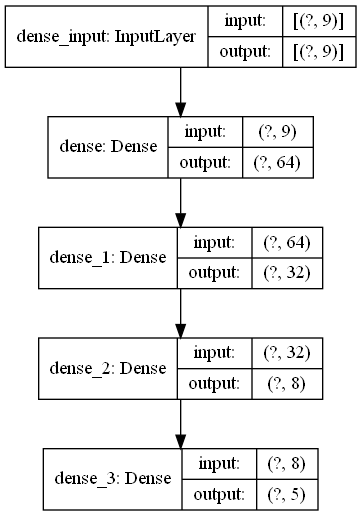

In [75]:
tf.keras.utils.plot_model(nonlinear_model, show_shapes=True)

In [76]:
hidden1 = nonlinear_model.layers[1]
hidden1.name

'dense_1'

In [77]:
weights, biases = hidden1.get_weights()

In [78]:
weights

array([[-0.06223363, -0.22846657, -0.07689464, ..., -0.10932827,
         0.02013302,  0.23874688],
       [ 0.2138378 , -0.14235729, -0.16573298, ..., -0.16302538,
         0.10364157,  0.01436538],
       [-0.14882928,  0.22484434,  0.1843    , ...,  0.23599887,
        -0.18232685,  0.0294525 ],
       ...,
       [-0.2431221 , -0.0520643 , -0.10374695, ..., -0.09917325,
        -0.07757515, -0.06648576],
       [-0.19586313,  0.01084602, -0.03111851, ...,  0.16966844,
        -0.14623338, -0.24761206],
       [-0.05921841, -0.22297907,  0.21548402, ..., -0.01424277,
         0.1579057 , -0.1023556 ]], dtype=float32)

In [79]:
weights.shape

(64, 32)

In [80]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [81]:
biases.shape

(32,)

In [82]:
nonlinear_model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=1),
                        loss='sparse_categorical_crossentropy',
                       metrics = ['accuracy'])
                       
history = nonlinear_model.fit(X_train, y_train, batch_size=64, epochs=50,
                    validation_data=(X_dev, y_dev))

Epoch 1/50
207/207 [==============================] - 0s 2ms/step - loss: 0.8715 - accuracy: 0.6994 - val_loss: 0.6067 - val_accuracy: 0.7735
Epoch 2/50
207/207 [==============================] - 0s 1ms/step - loss: 0.5135 - accuracy: 0.8036 - val_loss: 0.4501 - val_accuracy: 0.8214
Epoch 3/50
207/207 [==============================] - 0s 1ms/step - loss: 0.4082 - accuracy: 0.8412 - val_loss: 0.3733 - val_accuracy: 0.8625
Epoch 4/50
207/207 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8537 - val_loss: 0.3435 - val_accuracy: 0.8535
Epoch 5/50
207/207 [==============================] - 0s 990us/step - loss: 0.3309 - accuracy: 0.8643 - val_loss: 0.3383 - val_accuracy: 0.8635
Epoch 6/50
207/207 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.8738 - val_loss: 0.3282 - val_accuracy: 0.8622
Epoch 7/50
207/207 [==============================] - 0s 997us/step - loss: 0.2937 - accuracy: 0.8793 - val_loss: 0.3258 - val_accuracy: 0.8686
Ep

In [83]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 207}

In [84]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [85]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

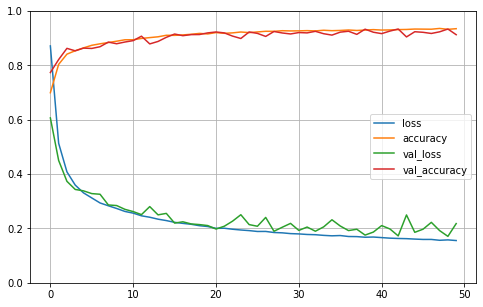

In [86]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [87]:
predictions = nonlinear_model.predict(X_dev)
result = tf.argmax(predictions, axis=1)
conf_mx = tf.math.confusion_matrix(y_dev, result.numpy()).numpy()
print(conf_mx)

[[1393   24    0   23   53]
 [  34  964    0   11    1]
 [   0    0    0    0    2]
 [   2    0    0  297   64]
 [  73    0    0    1  361]]


# Evaluation

In [88]:
from sklearn.metrics import accuracy_score

y_pred = tf.argmax(nonlinear_model.predict(X_test), axis = 1)
accuracy_score(y_test, y_pred)

0.9161821705426356

yaay

In [89]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(precision, recall, f1)

0.9174718875053544 0.9161821705426356 0.9162949929148406


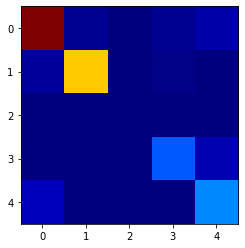

In [90]:
plt.imshow(conf_mx, cmap = "jet")
plt.show()